In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Acer\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("Car_Details_Car_Dekho.csv")
df

,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
1,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
2,Honda,Honda City V MT,2018,930000,14500,Petrol,Dealer,Manual,First Owner
3,Honda,Honda City i DTEC V,2014,560000,74000,Diesel,Individual,Manual,Second Owner
4,Honda,Honda City i DTEC VX,2014,675000,90000,Diesel,Dealer,Manual,First Owner
...,...,...,...,...,...,...,...,...,...
1715,Maruti,Maruti 800 AC,2014,195000,75000,Petrol,Individual,Manual,Second Owner
1716,Maruti,Maruti Alto 800 Base,2015,155000,40000,Petrol,Individual,Manual,First Owner
1717,Maruti,Maruti Alto LXi,2000,65000,90000,Petrol,Individual,Manual,Second Owner
1718,Maruti,Maruti Ritz VDi,2012,225000,90000,Diesel,Individual,Manual,Second Owner


In [3]:
df["fuel"].value_counts()

fuel
Petrol    1096
Diesel     578
CNG         31
LPG         15
Name: count, dtype: int64

In [4]:
df.isnull().sum(0)

Company          0
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

There are no null values in the dataset

In [5]:
df.columns

Index(['Company', 'name', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

In [6]:
df.describe()

,year,selling_price,km_driven
count,1720.000000,1.720000e+03,1720.000000
mean,2012.659884,3.595410e+05,63336.986047
std,4.618048,2.445697e+05,44724.303652
min,1992.000000,3.000000e+04,1000.000000
25%,2010.000000,1.600000e+05,35000.000000
50%,2014.000000,3.000000e+05,60000.000000
75%,2016.000000,5.099990e+05,80825.250000
max,2020.000000,1.800000e+06,806599.000000


These three columns are the numerical columns present in the dataset

# EDA

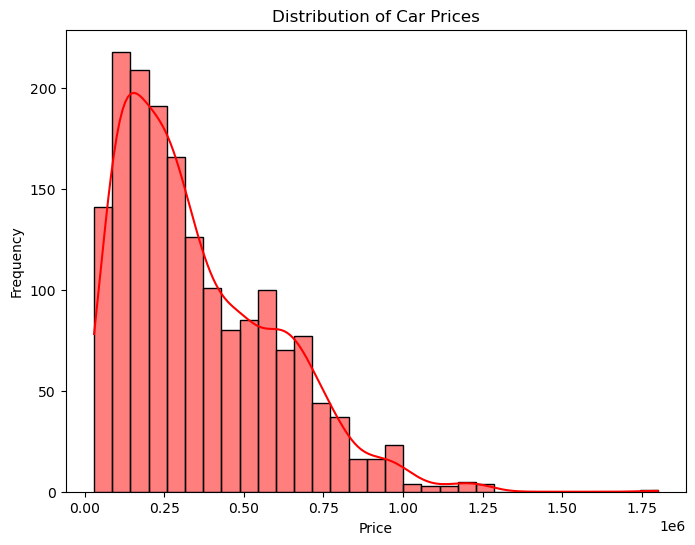

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['selling_price'], kde=True,color="r")
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram tells us that the selling price is left skewed as there are many cars with lower selling price.

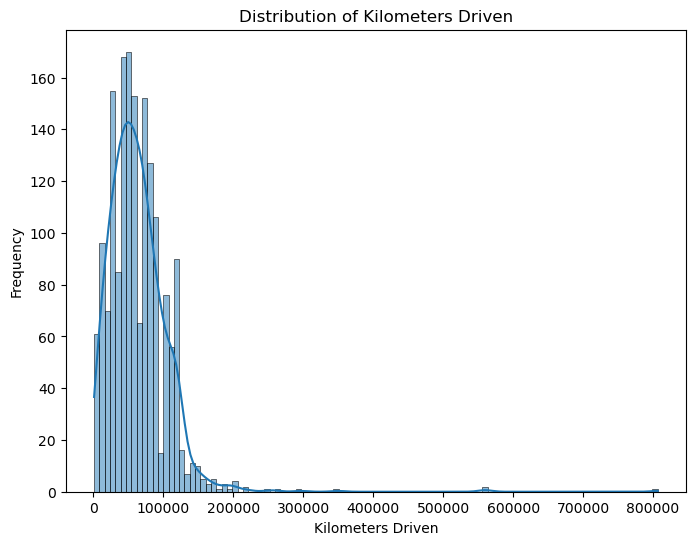

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(df['km_driven'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

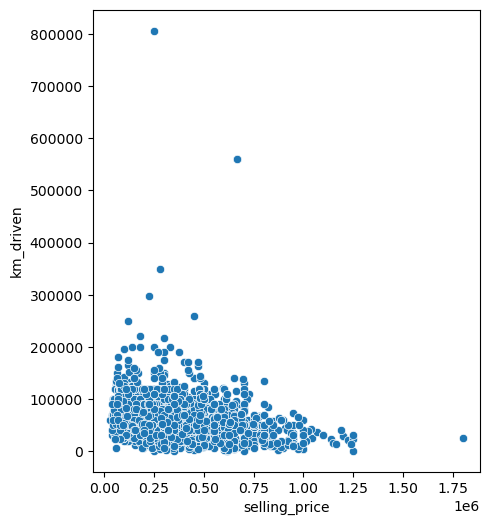

In [9]:
plt.figure(figsize=(5,6))
sns.scatterplot(data=df,x="selling_price",y="km_driven")
plt.show()

From the above scatterplot we can see that the cars that are with less km driven are easily sold and in the right bottom of the graph we can see one car with very low km has the highest selling price.

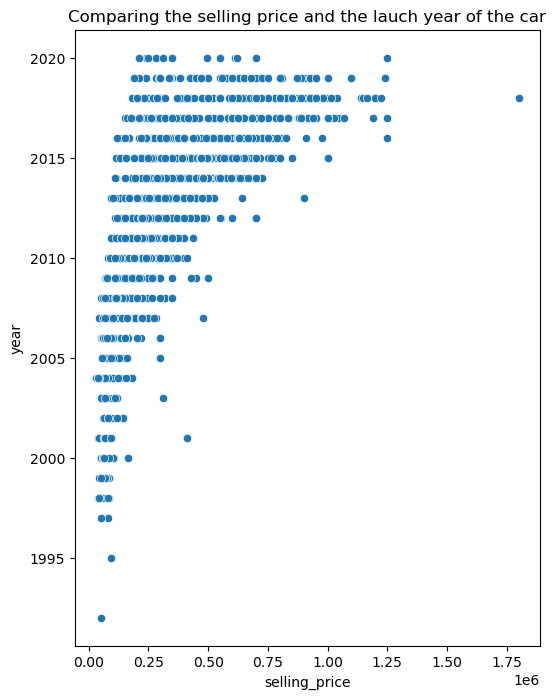

In [10]:
plt.figure(figsize=(6,8))
sns.scatterplot(x=df["selling_price"],y=df["year"])
plt.title("Comparing the selling price and the lauch year of the car")
plt.show()

From the above scatterplot we can see that cars model year after 2010 has the most number of sales and also with better price for different models and the older models have lesser selling price this maybe due to the kms driven by the cars.

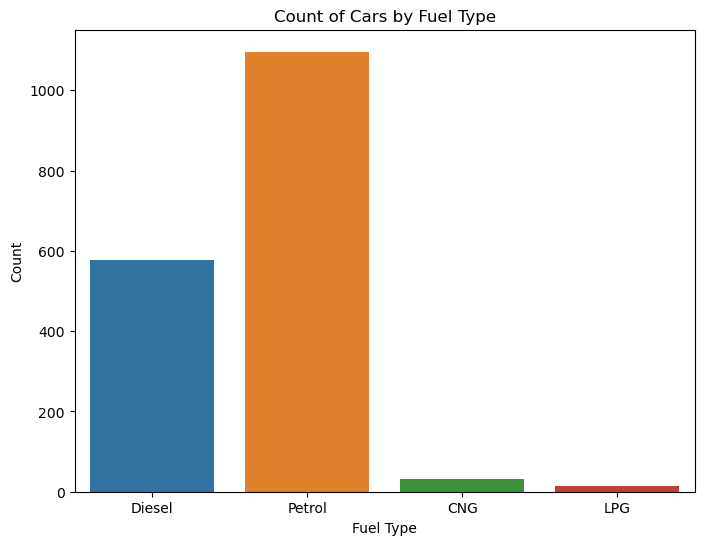

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fuel', data=df)
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

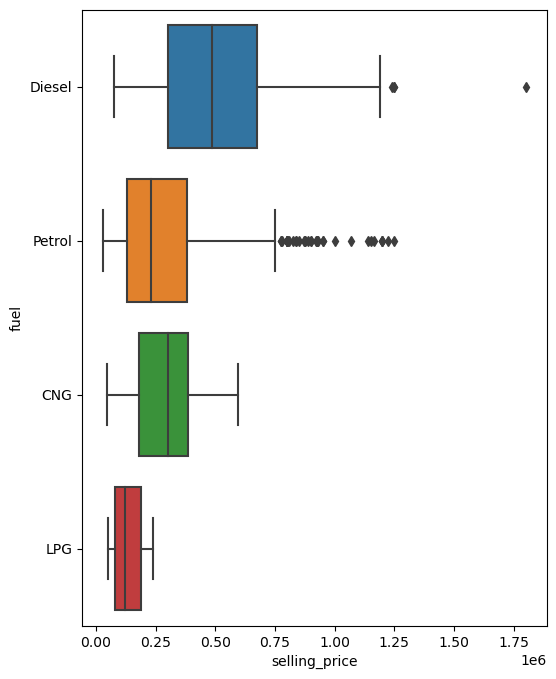

In [12]:
plt.figure(figsize=(6,8))
sns.boxplot(data=df,x="selling_price",y="fuel")
plt.show()

From the above boxplots we can see that there are more sales with the petrol cars and the diesel cars have the high selling price compared to others and is closely followed by
petrol cars.

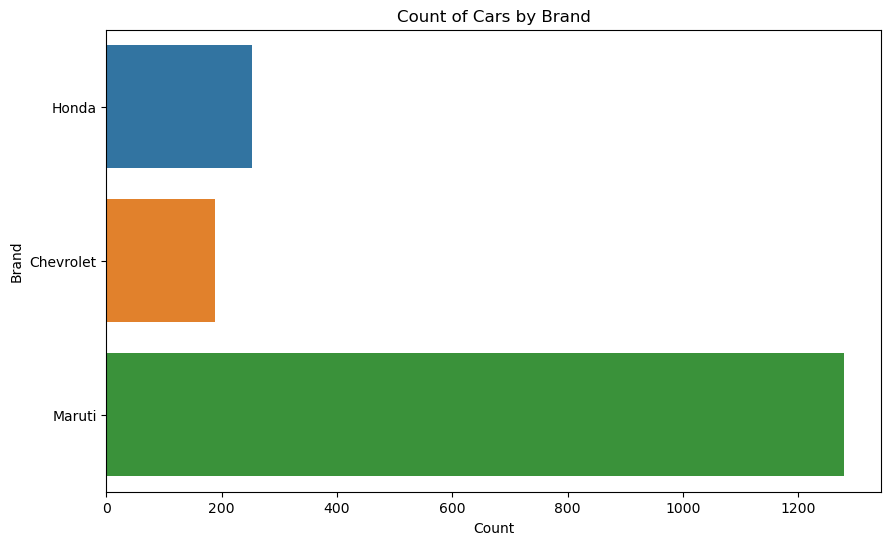

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Company', data=df)
plt.title('Count of Cars by Brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

From this countplot we can infere that Maruti company has the highest number of car sales and Honda with the second place and chevrolet being the last.

This can be due to the price of the cars Maruti have more variety of models ranging from the most affordable to costlier ones. Hence it has the most number of customers.

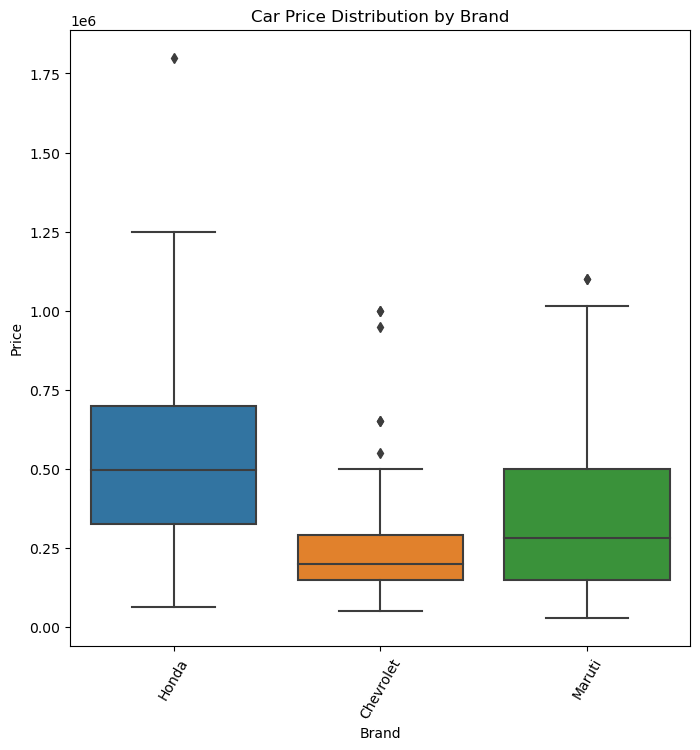

In [14]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Company', y='selling_price', data=df)
plt.title('Car Price Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=60)
plt.show()

In this we can see clearly why Maruti has the most sales it have wide variety of models in wide price range making it an option for more people where as Honda sitting at second might not be affordable to all because of it price. On the other hand Chevrelet is sitting at last due to its lack of variety in the models.

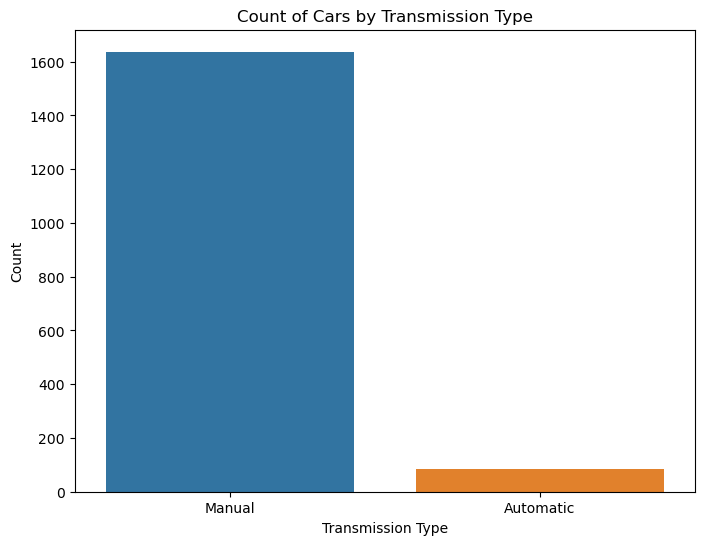

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='transmission', data=df)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

with this countplot we can see there are too many Manual cars and fewer automatic cars this shows how people still love the old manual transmission cars rather than having an automatic one.

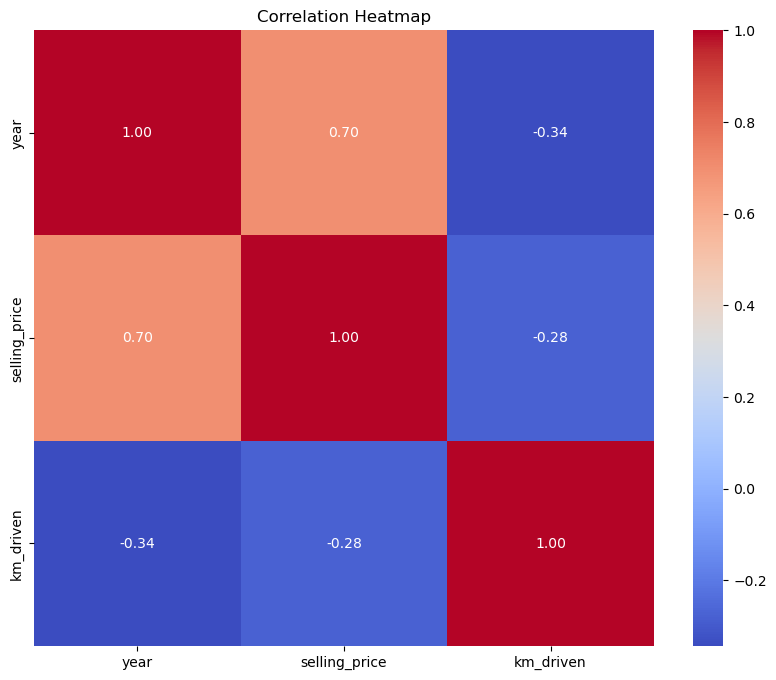

In [16]:
df_num=df.select_dtypes("int")
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The above heatmap tells us about the correlation between the various columns in the dataset 

## Scaling and Clustering the data

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
ss= StandardScaler()
scaled = ss.fit_transform(df_num)
df_scaled = pd.DataFrame(scaled,columns=df_num.columns)

In [19]:
df_scaled

,year,selling_price,km_driven
0,0.290275,0.369977,1.736988
1,0.290275,0.369977,1.736988
2,1.156694,2.333179,-1.092274
3,0.290275,0.819878,0.238486
4,0.290275,1.290228,0.596337
...,...,...,...
1715,0.290275,-0.672973,0.260852
1716,0.506880,-0.836573,-0.521948
1717,-2.742190,-1.204673,0.596337
1718,-0.142934,-0.550273,0.596337


In [20]:
kmeans = KMeans(n_clusters=3,random_state=32)
kmeans.fit(df_scaled)


KMeans(n_clusters=3, random_state=32)

In [21]:
cluster_labels = kmeans.labels_

In [22]:
df["cluster_labels"] = cluster_labels
df

,Company,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,cluster_labels
0,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2
1,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2
2,Honda,Honda City V MT,2018,930000,14500,Petrol,Dealer,Manual,First Owner,1
3,Honda,Honda City i DTEC V,2014,560000,74000,Diesel,Individual,Manual,Second Owner,2
4,Honda,Honda City i DTEC VX,2014,675000,90000,Diesel,Dealer,Manual,First Owner,1
...,...,...,...,...,...,...,...,...,...,...
1715,Maruti,Maruti 800 AC,2014,195000,75000,Petrol,Individual,Manual,Second Owner,2
1716,Maruti,Maruti Alto 800 Base,2015,155000,40000,Petrol,Individual,Manual,First Owner,2
1717,Maruti,Maruti Alto LXi,2000,65000,90000,Petrol,Individual,Manual,Second Owner,0
1718,Maruti,Maruti Ritz VDi,2012,225000,90000,Diesel,Individual,Manual,Second Owner,2


In [23]:
df["cluster_labels"].value_counts()

cluster_labels
2    716
0    539
1    465
Name: count, dtype: int64

## Visualising the clusters

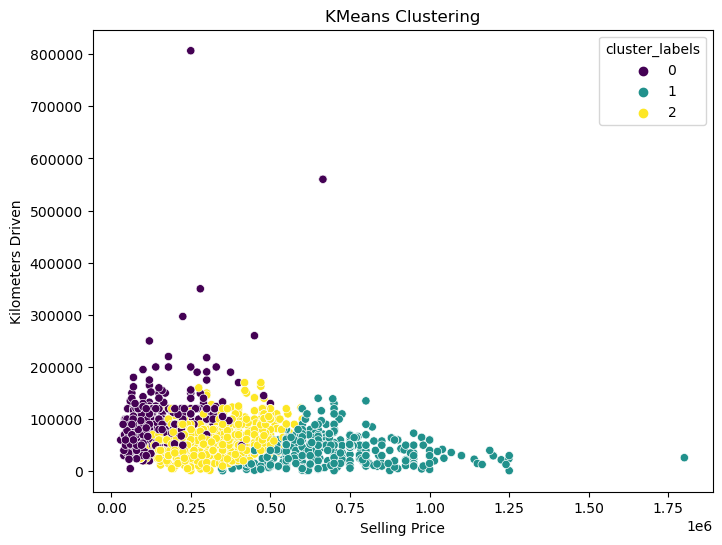

In [24]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='selling_price', y='km_driven', hue='cluster_labels', data=df, palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Selling Price')
plt.ylabel('Kilometers Driven')
plt.show()